In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_style('darkgrid')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



## True Function

In [25]:
def RealFunction(X):
    return 2.5*np.sin(1.5*np.pi*(X))

## Generate Data Around the True Function


Text(0.5, 1.0, 'Figure 1: True Function and Samples')

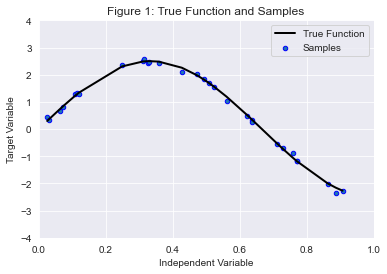

In [26]:
n = 30
X = np.sort(np.random.rand(n))
y = RealFunction(X)
y_ = y + np.random.randn(n) * 0.1

fig, ax = plt.subplots()
ax.plot(X, y, lw=2, color='black', label="True Function")
ax.scatter(X, y_, edgecolor='b', s=20, label="Samples")
ax.set_xlabel("Independent Variable")
ax.set_ylabel("Target Variable")
ax.legend()
ax.set_xlim((0, 1))
ax.set_ylim((-4, 4))
ax.set_title('Figure 1: True Function and Samples')


## Is The Mean Of Error Zero?

In [27]:
Error = y - y_
print(Error.mean())

0.010181799666044617


Text(0.5, 1.0, 'Figure 2: Error vs Number Of Samples')

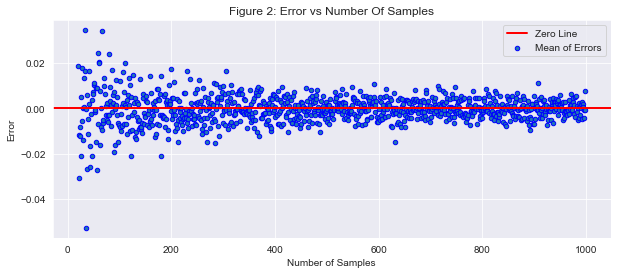

In [28]:
mean_value = []
nn = 1000
for number in range(20,nn):

    X = np.sort(np.random.rand(number))
    y = RealFunction(X)
    y_ = y + np.random.randn(number) * 0.1
    error = y - y_
    mean_value.append(error.mean())
    
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x=range(20, nn), y=mean_value, edgecolor='b', s=20, label="Mean of Errors")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Error")
ax.axhline(y=0, color='red', lw=2, label='Zero Line')
ax.legend()

ax.set_title('Figure 2: Error vs Number Of Samples')


Text(0.5, 1.0, 'Figure 3b: Mean Squared Error vs Model Degree')

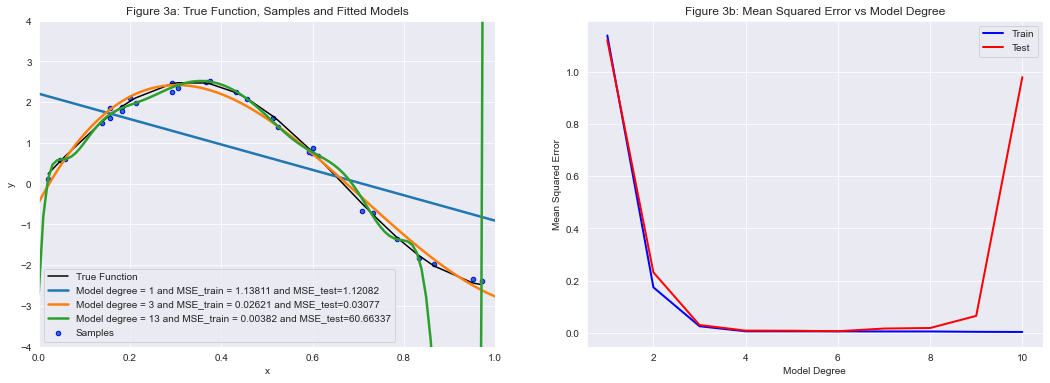

In [29]:


np.random.seed(42)
n = 30
X = np.sort(np.random.rand(n))
y = RealFunction(X)
y_ = y + np.random.randn(n) * 0.1
XX = np.linspace(0, 1, 100)
X_train, X_test , y_train, y_test = train_test_split(X, y_, test_size=0.3, shuffle=True, random_state=42)

fig, [ax0, ax1] = plt.subplots(1,2,figsize=(18,6))
ax0.plot(X, y, lw=1.5, color='black', label="True Function")
ax0.scatter(X, y_, edgecolor='b', s=20, label="Samples")
ax0.set_xlabel("Independent Variable")
ax0.set_ylabel("Target Variable")
ax0.legend()
ax0.set_xlim((0, 1))
ax0.set_ylim((-4, 4))
pipes = []
degrees = [1, 2, 3 ,4, 5, 6, 7, 8, 9,10,12, 13]    
    
names = [str(x) for x in degrees]    
mse_train = [] 
mse_test = []
for degree,name in zip(degrees, names):
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degree,  include_bias=False)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])

    result = pipeline.fit(X_train[:, np.newaxis], y_train)
    score = result.score(X_train[:, np.newaxis], y_train)
    y_pred_train = pipeline.predict(X_train[:, np.newaxis])
    score_train = mean_squared_error(y_train, y_pred_train)
    y_pred_test = pipeline.predict(X_test[:, np.newaxis])
    score_test = mean_squared_error(y_test, y_pred_test)
    #score = scores.mean()
    mse_train.append(score_train)
    mse_test.append(score_test)
    y_pred = pipeline.predict(XX[:, np.newaxis]) 
    if degree in [1, 3, 13]:
        ax0.plot(XX, y_pred, lw=2.5, label="Model degree = {} and MSE_train = {} and MSE_test={}".\
            format(name, np.round(score_train,5), np.round(score_test, 5)))
    ax0.set_xlabel("x")
    ax0.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-4, 4))
    ax0.legend(loc="best")
    ax0.set_title('Figure 3a: True Function, Samples and Fitted Models')
ax1.plot(degrees[:-2], mse_train[:-2], color = 'blue', lw=2, label='Train')
ax1.plot(degrees[:-2], mse_test[:-2], color='red',lw=2 ,label='Test')
ax1.legend()
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Model Degree')
ax1.set_title('Figure 3b: Mean Squared Error vs Model Degree')


## Minimum Error or Irreducible Error

In [33]:
mean_squared_error(y, y_)

0.008544154434148904

In [31]:
mean_squared_error(RealFunction(X_train), y_train)

0.00806231730581152